In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from time import time as t
from security_simulation import *
from RL_method.RL_ppo import *

import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

"""parameters"""
num_episode = 500
num_pc = 7
port_size = num_pc*2

In [2]:
def main(episodes):
    model = PPO()
    score = 0.0
    print_interval = 20
    scoreList = []
    success_rate_list = []
    try_list = []
    suc_act = success_action()
    _try = 0
    _success = 0
    
    for n_epi in range(1, episodes+1):
        seed = int(str(t0)[11:14])
        env = security(num_pc=num_pc, seed=seed, port_size=port_size)
        s = env.reset()
        done = False
        
        while not done:
            for t in range(T_horizon):
                prob = model.pi(torch.from_numpy(s).float())
                m = Categorical(prob)
                a = m.sample().item()
                s_prime, r, done, info = env.step(a)

                model.put_data((s, a, r, s_prime, prob[a].item(), done))
                s = s_prime
                score += r
                
                if info[2]:
                    _try += 1
                    _success += 1
                else:
                    _try += 1
                
                if done:
                    break
                    
            suc_act.put(select_action(a))
            model.train_net()

        if n_epi % print_interval == 0 and n_epi != 0:
            scoreList.append(score/print_interval)
            success_rate_list.append(round(_success/_try, 2))
            try_list.append(_try)
            print("\repisode : {}, avg score : {:.1f}".format(n_epi, score/print_interval))
            score = 0.0
            _try = 0
            _success = 0
            suc_act.reset()
            
        if n_epi != print_interval and n_epi != episodes:
            print(f"\r{n_epi % print_interval} / {print_interval}", end="")
    
    return scoreList, success_rate_list, try_list, suc_act.load_list()

In [3]:
scoreList, success_rate_list, try_list, action_re = main(num_episode)

episode : 20, avg score : -6.8
episode : 40, avg score : -7.5
episode : 60, avg score : -7.8
episode : 80, avg score : -5.7
episode : 100, avg score : -4.8
episode : 120, avg score : -2.8
episode : 140, avg score : -6.5
episode : 160, avg score : -5.5
episode : 180, avg score : -6.1
episode : 200, avg score : -6.3
episode : 220, avg score : -4.7
episode : 240, avg score : -4.2
episode : 260, avg score : -4.0
episode : 280, avg score : -5.7
episode : 300, avg score : -5.0
episode : 320, avg score : -5.0
episode : 340, avg score : -2.8
episode : 360, avg score : -2.4
episode : 380, avg score : -6.4
episode : 400, avg score : -5.0
episode : 420, avg score : -1.0
episode : 440, avg score : -1.6
episode : 460, avg score : -2.1
episode : 480, avg score : 0.0
episode : 500, avg score : -6.3


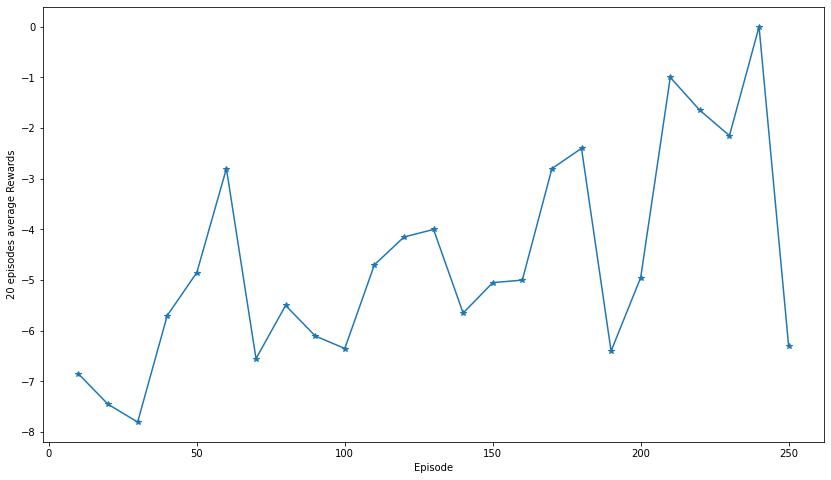

In [4]:
#performance visualization
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1, len(scoreList)+1) * 10, scoreList, '*-')
plt.xlabel('Episode')
plt.ylabel('20 episodes average Rewards')
plt.ylim = (-num_pc*1.2, num_pc*1.2)
plt.show()

In [5]:
"""
with open("result_graphs/PPO_avgReward.p", "wb") as f:
    pickle.dump(scoreList, f)

with open("result_graphs/PPO_success.p", "wb") as f:
    pickle.dump(success_rate_list, f)
    
with open("result_graphs/PPO_iteration.p", "wb") as f:
    pickle.dump(try_list, f)
    
with open("result_graphs/PPO_action_re.p", "wb") as f:
    pickle.dump(action_re, f)
"""

'\nwith open("result_graphs/PPO_avgReward.p", "wb") as f:\n    pickle.dump(scoreList, f)\n\nwith open("result_graphs/PPO_success.p", "wb") as f:\n    pickle.dump(success_rate_list, f)\n    \nwith open("result_graphs/PPO_iteration.p", "wb") as f:\n    pickle.dump(try_list, f)\n    \nwith open("result_graphs/PPO_action_re.p", "wb") as f:\n    pickle.dump(action_re, f)\n'